# Diamond price prediction
**import libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set(rc={"figure.figsize":[7,5]}, font_scale = 1.1)

## Information on dataset

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [3]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
print("Original shape is 53940 X 10")
df.shape

Original shape is 53940 X 10


(43040, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


**No null data, 10 columns included 3 objects and 7 numerical**

**Shows unique objects value**

In [7]:
# Excellent
# Very good
# Good
# Fair
# Poor
df["cut"].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [8]:
df["clarity"].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

In [9]:
df["color"].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [10]:
df["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [11]:
df["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [12]:
df["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Visualization & Preprocessing

          carat     depth     table     price         x         y         z
carat  1.000000  0.022599  0.191260  0.923801  0.974368  0.946001  0.948625
depth  0.022599  1.000000 -0.292084 -0.014393 -0.031088 -0.034945  0.088335
table  0.191260 -0.292084  1.000000  0.136975  0.204768  0.191469  0.159775
price  0.923801 -0.014393  0.136975  1.000000  0.887483  0.863748  0.860625
x      0.974368 -0.031088  0.204768  0.887483  1.000000  0.969541  0.966909
y      0.946001 -0.034945  0.191469  0.863748  0.969541  1.000000  0.944215
z      0.948625  0.088335  0.159775  0.860625  0.966909  0.944215  1.000000


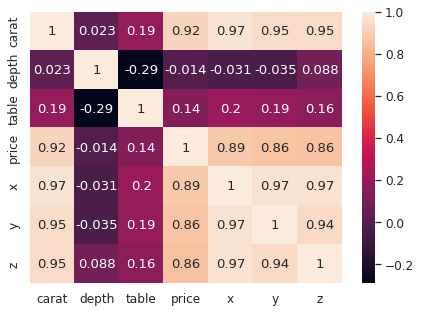

In [14]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

* 1- We see here there\`s a relation between **carat** and **price** exponentialy the correlation is **0.921591.**

* From correlation we see strong correlation between x, y, z and price, carat.
* Strong correlation between carat and the price

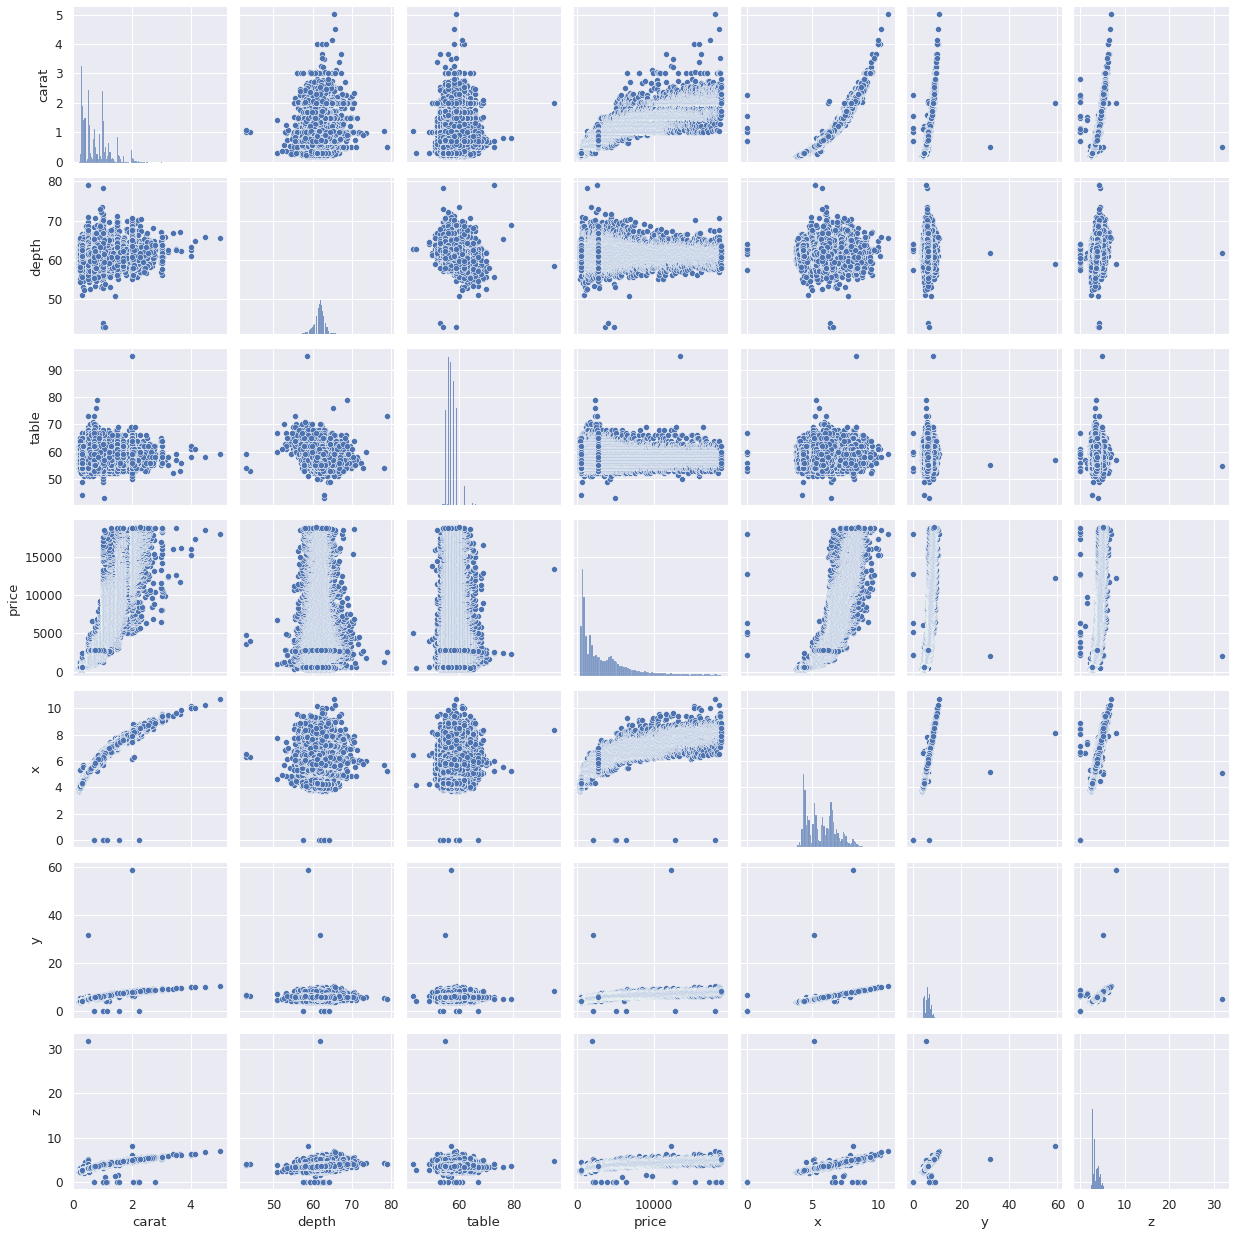

In [15]:
sns.pairplot(df)

* We see in whole graph there\`s nearly linear relation between carat and y, z.
* linear relation between x and z, y.
* **But** there\`s a relation between carat and the price that goes **<span style = "color:blue"> exponentially </span>** not linear.

### Some visualization on numerical data that has real correlation

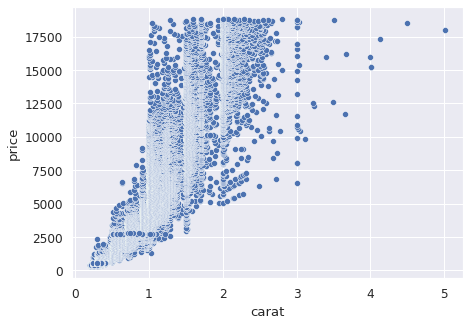

In [16]:
sns.scatterplot(x=df["carat"], y = df["price"])

**As we know that the relation between carat and price goes exponentially that means carat is so important**
* We see in that graph there\`s some outliers when carat > 3

In [17]:
df[df["carat"] > 3].shape
#About 32 rows

(32, 10)

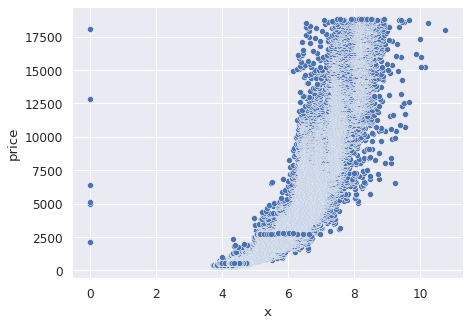

In [18]:
sns.scatterplot(x=df["x"], y = df["price"])

**The relation between x and price seem to goes exponentially.**
* We have some outliers when x less than 2 they are.

In [19]:
df[df["x"] < 2 ].shape
#About 8 rows

(7, 10)

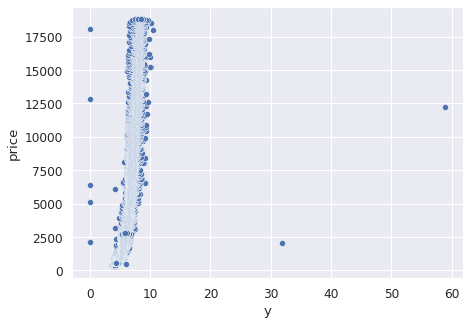

In [20]:
sns.scatterplot(x=df["y"], y = df["price"])

* We have outliers when y above 30 or y > 30.

In [21]:
df[df["y"] > 30 ].shape
#Only two rows

(2, 10)

In [22]:
df[df["y"] > 30 ]

,carat,cut,color,clarity,depth,table,price,x,y,z
19301,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
39650,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


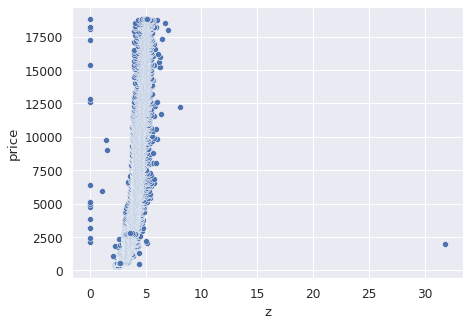

In [23]:
sns.scatterplot(x=df["z"], y = df["price"])

* We have outliers in z when it is above 30 or z > 30.

In [24]:
df[df["z"] > 30 ].shape
#There`s only one row

(1, 10)

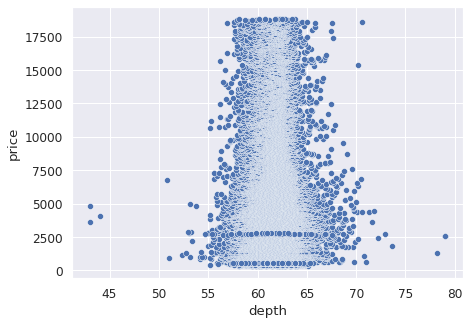

In [25]:
sns.scatterplot(x= df["depth"] , y=df["price"])

* May it\`s an outliers in the relation between depth and price when depth is above 75 and less than 45

In [26]:
df[(df["depth"] > 75) | (df["depth"] < 45 )].shape
#About 6 rows

(6, 10)

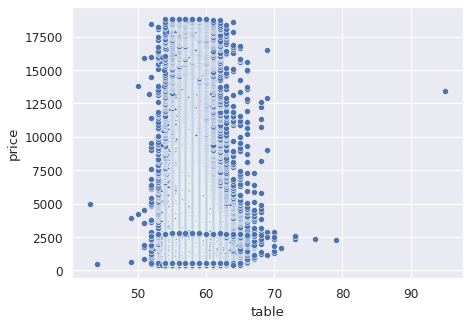

In [27]:
sns.scatterplot(x= df["table"] , y=df["price"])

* Outliers between table and price when table is above 90.

In [28]:
df[df["table"] > 90].shape
#Only one row

(1, 10)

## Work on outliers
**Identifying the outliers indexes**

In [29]:
carat_index = list(df[df["carat"] >= 3].index)
x_index = list(df[df["x"] < 2 ].index)
y_index = list(df[df["y"] > 30 ].index)
z_index = list(df[df["z"] > 30 ].index)
depth_index = list(df[(df["depth"] > 75) | (df["depth"] < 45 )].index)
table_index = list(df[df["table"] > 90].index)

indexes = carat_index + x_index + y_index + z_index + depth_index + table_index
len(indexes)

57

**Delete the outliers**

In [30]:
print("DataFrame shape before delete outliers is. ", df.shape)
for outlier in indexes:
    df.drop(outlier, inplace=True)
print("DataFrame shape after deleting outliers. ",df.shape)

DataFrame shape before delete outliers is.  (43040, 10)
DataFrame shape after deleting outliers.  (42983, 10)


## Back to vsuialize numerical data after removing outliers

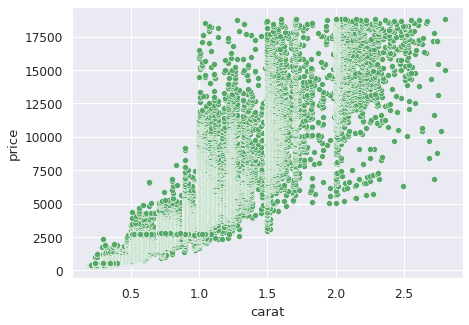

In [31]:
sns.scatterplot(x=df["carat"], y = df["price"], color='g')

**It lokes like better**

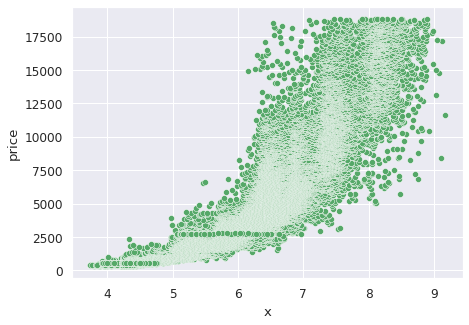

In [32]:
sns.scatterplot(x=df["x"], y = df["price"], color='g')

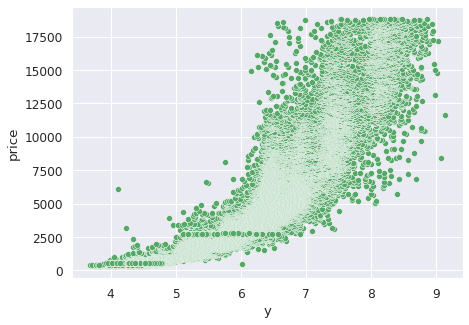

In [33]:
sns.scatterplot(x=df["y"], y = df["price"], color='g')

* **<span style="color:orange">Note that:</span>** before removing outliers the relation between y and the price isn\`t clear but after removing some outliers it seems like it goes exponentially.

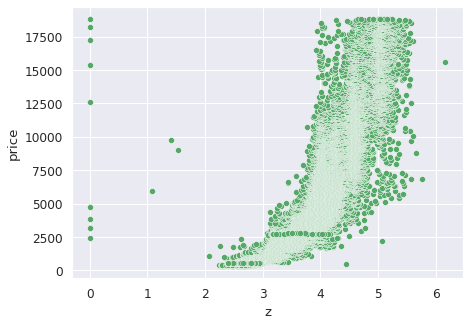

In [34]:
sns.scatterplot(x=df["z"], y = df["price"], color='g')

* Seem still some outliers when z < 2

In [35]:
z_index2 = list(df[df["z"] < 2].index)
for i in z_index2:
    df.drop(i, inplace=True)

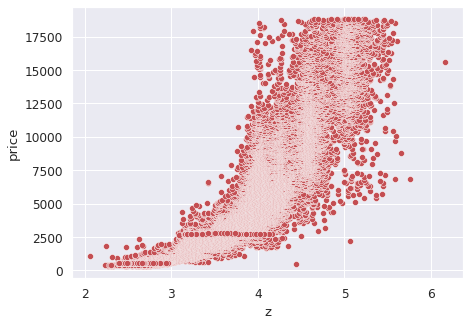

In [36]:
sns.scatterplot(x=df["z"], y = df["price"], color='r')

* the relation between z and price now goes exponentially just like x and y, now z is clear.

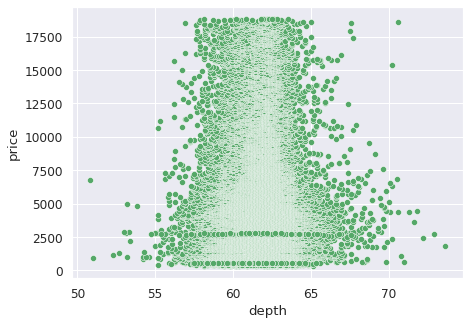

In [37]:
sns.scatterplot(x= df["depth"] , y=df["price"], color='g')

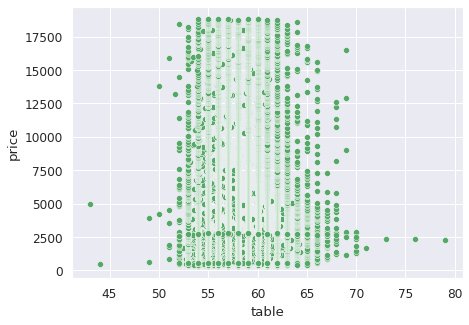

In [38]:
sns.scatterplot(x= df["table"] , y=df["price"], color='g')

## Categorical data
**Coutplot on the three categorical data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


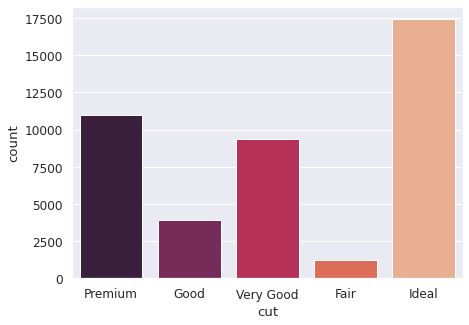

In [39]:
sns.countplot(df["cut"], palette='rocket')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


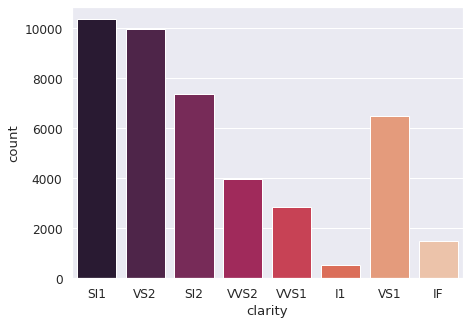

In [40]:
sns.countplot(df["clarity"], palette='rocket')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


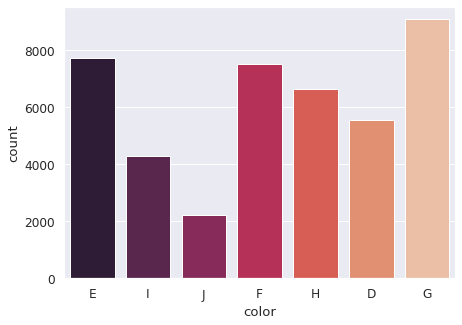

In [41]:
sns.countplot(df["color"], palette='rocket')

# Domain knowledge
## The 4C\`s.
**We go through these types of diamond charactirstics**
* Carat
* Cut
* Clarity
* Color

**And we show the relationship between those**

- 1- Carat and price.
- 2- Cut and price.
- 3- Clarity and price.
- 4- Color and price.

**Additionally we have dimension x, y, z related with price and it had strong correlation between them and the price**

**Finally relation between the 4C\`s**

## 4C\`s: 1st one is Carat
**To predict the price**

- We know that carat and price correlation is **0.921591.**
- We see that the relation between **carat** and **price** is exponentioally not linear.
- and we see here there\`s some outliers when the **carat** == 4 or above that.
* let\`s see its indexes.

### Cut details
- cut is the most important, the better cut the more diamond sparkle.
- Diamond has 4 great parts " Table, Crown, Gridle, Pavilion.
- even though the diamond has perfect color and clarity a diamond with a poor cut will <span style="color:green">dulled brilliance.</span>

In [42]:
depth = df["z"] / ((df["x"] + df["y"])/2) * 100
pd.DataFrame(depth, columns=["Depth size in percent"]).head(15)

,Depth size in percent
0,59.767141
1,62.396204
2,63.291139
3,62.784810
4,62.295082
5,65.098039
6,64.009379
7,60.362694
8,62.155963
9,60.212202


## Converting  Categorical Data (CCD)

In [43]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [44]:
def grade(x):
    x = str(x)
    if x == "Fair":
        return 1
    elif x == "Good":
        return 2
    elif x == "Very Good":
        return 3
    elif x == "Premium":
        return 4
    elif x == "Ideal":
        return 5

In [45]:
df["cut_grade"] = df["cut"].apply(grade)
df["cut_grade"].unique()

array([4, 2, 3, 1, 5])

In [46]:
def color_grade(x):
    x = str(x)
    if x == "J":
        return 1
    elif x == "I":
        return 2
    elif x == "H":
        return 3
    elif x == "G":
        return 4
    elif x == "F":
        return 5
    elif x == "E":
        return 6
    elif x == "D":
        return 7

**Color grades order: D > E > F > G > H > I, J**

In [47]:
df["color_grade"] = df["color"].apply(color_grade)
df["color_grade"].unique()

array([6, 2, 1, 5, 3, 7, 4])

**Clarity quality order: IF > VVS2 or VVS1 > VS1 or VS2 > SI1 or SI2 > I1**
- Flawless Diamonds
    - FL & IF Diamonds (Rare Finds)
- Slightly Included Diamonds
    - VVS Diamonds (Excellent Quality)
    - VS & SI Diamonds (Best Value & Most Popular) 

In [48]:
def clarity_quality(x):
    x = str(x)
    if x == "I1":
        return 1
    elif x == "SI2":
        return 2
    elif x == "SI1":
        return 3
    elif x == "VS2":
        return 4
    elif x == "VS1":
        return 5
    elif x == "VVS2":
        return 6
    elif x == "VVS1":
        return 7
    elif x == "IF":
        return 8

In [49]:
df["clear_quality"] = df["clarity"].apply(clarity_quality)
df["clear_quality"].unique()

array([3, 4, 2, 6, 7, 1, 5, 8])

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,3,2,7


## Drop un-wanted columns

In [51]:
df.drop(["cut","color","clarity","depth","table"], inplace=True, axis=1)
#Final DataFrame
df.head(2)

,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.21,326,3.89,3.84,2.31,4,6,3
1,0.29,334,4.20,4.23,2.63,4,2,4


In [57]:
df.to_csv('Diamond_after_Processing.csv' ,index = False)

## The End Of Preprocessing

## Machine Learning
**Split data into training and testing**

In [59]:
df.head()

,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.21,326,3.89,3.84,2.31,4,6,3
1,0.29,334,4.20,4.23,2.63,4,2,4
2,0.31,335,4.34,4.35,2.75,2,1,2
3,0.24,336,3.94,3.96,2.48,3,1,6
4,0.24,336,3.95,3.98,2.47,3,2,7


In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis = 1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

#print all shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32227, 7)
(10743, 7)
(32227,)
(10743,)


**Import DecisionTreeRegressor**

In [61]:
from sklearn.tree import DecisionTreeRegressor

model_deployment = DecisionTreeRegressor(max_depth = 21,random_state=400)
model_deployment.fit(X_train, y_train)
y_pred = model_deployment.predict(X_test)
#Model score
print("Model train accuracy score is :", model_deployment.score(X_train, y_train))
print("Model test accuracy score is :", model_deployment.score(X_test, y_test))


Model train accuracy score is : 0.9997275013643832
Model test accuracy score is : 0.9639375910671008


In [62]:
tree_mse = mean_squared_error(y_test, y_pred)
print("mse = " , tree_mse)
tree_rmse = np.sqrt(tree_mse)
print("rmse = " , tree_rmse)


mse =  569830.2647501656
rmse =  754.8710252421705


**Find max_depth**

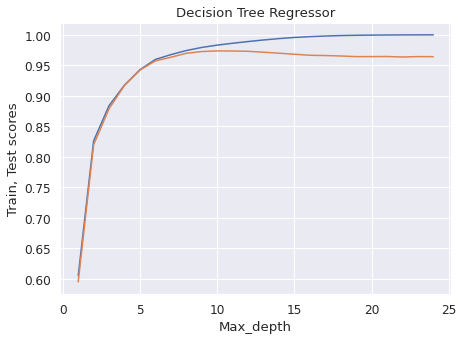

In [63]:
depths = [i for i in range(1, 25)]
train_score = []
test_score = []

for i in depths:
    DTR = DecisionTreeRegressor(max_depth = i)
    DTR.fit(X_train, y_train)
    train_score.append(DTR.score(X_train, y_train))
    test_score.append(DTR.score(X_test, y_test))
    
plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Decision Tree Regressor")
plt.show()

**Best max_depth is 7**

**Model performance**

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2_Score is: ", r2_score(y_test, y_pred).round(4))

R2_Score is:  0.9639


**Try to predict diamond price predictions**

In [67]:
df.iloc[400]

carat               0.80
price            2829.00
x                   6.05
y                   6.01
z                   3.63
cut_grade           4.00
color_grade         6.00
clear_quality       2.00
Name: 400, dtype: float64

In [70]:
df.iloc[400].to_frame()
print("Try to predict existing data the row number 400 existed price 2829.00, let's see the ML says: ")
print("ML price ", model_deployment.predict([[ 0.80,  6.05 , 6.01, 3.63, 4.00, 6.00, 2.00]])[0])

Try to predict existing data the row number 400 existed price 2829.00, let's see the ML says: 
ML price  2845.8571428571427


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
print(df.iloc[5000])
df.iloc[5000].to_frame()
print("Try to predict existing data the row number 5000 existed price 4004.00, let`s see the ML says: ")
print("ML price ", model_deployment.predict([[1.01, 6.42, 6.46, 3.91, 3.00, 5.00, 2.00]])[0])

carat               1.01
price            4004.00
x                   6.42
y                   6.46
z                   3.91
cut_grade           3.00
color_grade         5.00
clear_quality       2.00
Name: 5004, dtype: float64
Try to predict existing data the row number 5000 existed price 4004.00, let`s see the ML says: 
ML price  3989.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Save and deploy model**

In [72]:
import joblib

joblib.dump(model_deployment, "Diamond predictions with decision tree.h5")
joblib.load("Diamond predictions with decision tree.h5")

DecisionTreeRegressor(max_depth=21, random_state=400)

#**Linear regression**

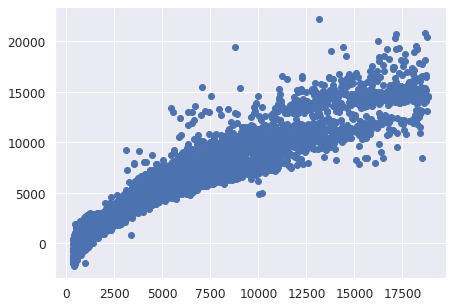

In [73]:
from sklearn.linear_model import LinearRegression
# Create an object of LinearRegression model
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred=reg_all.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [74]:
print("Model train accuracy score is :", reg_all.score(X_train, y_train))
print("Model test accuracy score is :", reg_all.score(X_test, y_test))

Model train accuracy score is : 0.916089470206155
Model test accuracy score is : 0.9164134961816611


#**Regression Evaluation Metrics**

In [75]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("MSE = " , lin_mse)
print("RMSE= " , lin_rmse)


MSE =  1320769.2167478143
RMSE=  1149.2472391734575
